In [ ]:
import joblib
from google.colab import drive
drive.mount('/content/drive')
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/raw_data.csv')


In [ ]:
df.drop(df[df['content'].isna()].index, inplace=True)

In [ ]:
def check_url(url):
  if url is None or isinstance(url, float):
    return False
  return 'RFIvi' in url
print(df['url'].apply(check_url).sum())

232


*   https://www.facebook.com/viettan: 390
*   https://www.facebook.com/minhduhis: 61
*   https://www.facebook.com/BBCnewsVietnamese: 818
*   https://www.facebook.com/baovietnam2016: 285
*   https://www.facebook.com/Vietnamcivilrights: 203
*   https://www.facebook.com/tudodanchudanguyen: 54
*   https://www.facebook.com/vtcnewsvn: 398
*   https://www.facebook.com/baodantridientu: 325
*   https://www.facebook.com/vitamvocvietVTV: 266
*   https://www.facebook.com/tintucvtv24: 290
*   https://www.facebook.com/thoisuvtv: 64
*   https://www.facebook.com/nhanvangiaiphamvn: 143
*   https://www.facebook.com/RFIvi: 232
*   https://www.facebook.com/100013451416651/: 22
*   https://www.facebook.com/khanhtuanng: 23
*   Chatgpt + arg: 197


In [ ]:
import re

def normalize_text(text):
    text = re.sub('[^A-Za-z]+', ' ', text).lower()
    return re.sub(r'\d', ' ', text)

def length_text(text):
    return len(text)

df['content_normalize'] = df['content'].apply(normalize_text)
df['length'] = df['content_normalize'].apply(length_text)

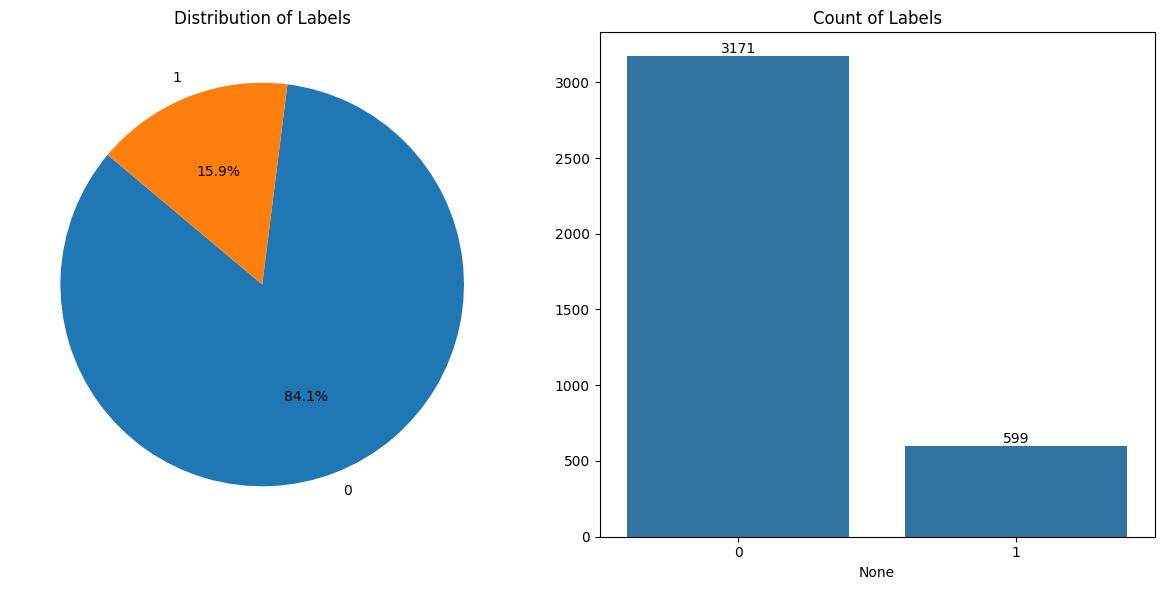

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count = df['label'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Labels')
axs[1] = sns.barplot(x=count.index, y=count.values)
axs[1].bar_label(axs[1].containers[0], fontsize=10);
axs[1].set_title('Count of Labels')
plt.tight_layout()
plt.show()

In [ ]:

df['label'].replace(2, 0, inplace=True)

0    3171
1     599
Name: label, dtype: int64


<ipython-input-23-d454ff4f0c42>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


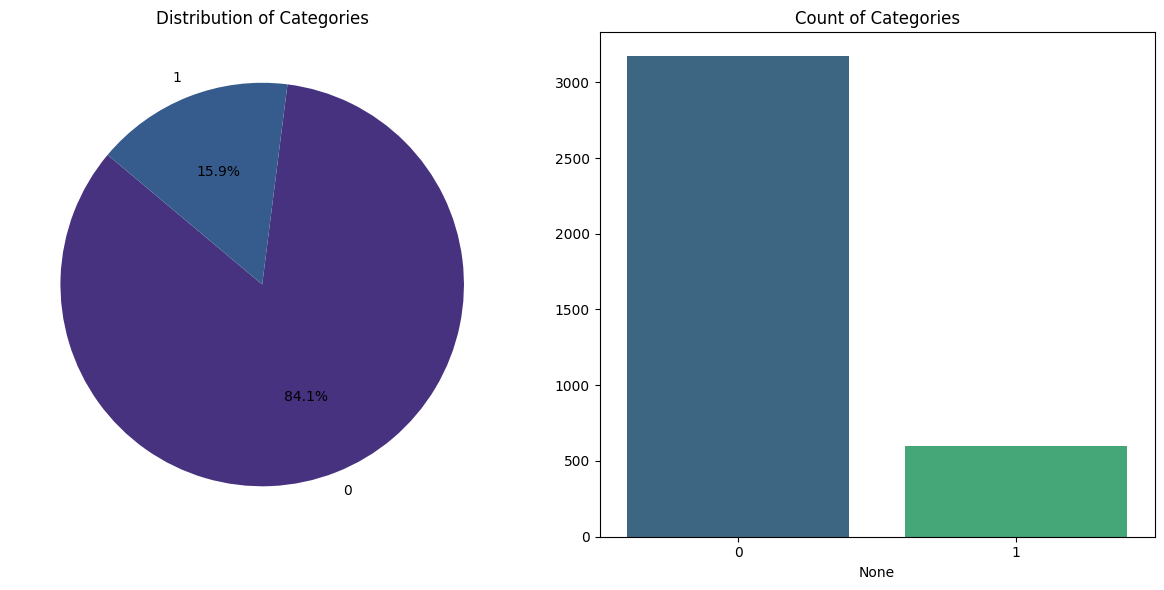

In [ ]:
count = df['label'].value_counts()
print(count)
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
palette = sns.color_palette('Set2')
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Length of sentences distribution')

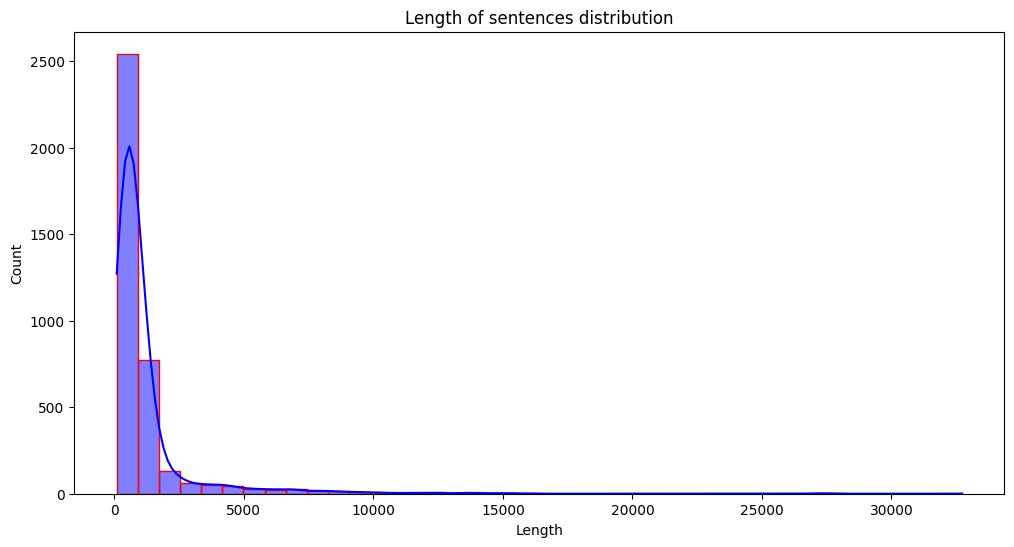

In [ ]:
# length_count = df['length'].value_counts()
# temp = pd.DataFrame()
plt.figure(figsize=(12, 6))
sns.histplot(df['length'],bins=40,color='Blue',edgecolor='Red',kde=True)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Length of sentences distribution")

In [ ]:
print(df['content'][:10])

0    bca bắt 2 chủ tịch tỉnh và một loạt tòng phạm\...
1    luật sư tố những thủ đoạn ăn gian điện của evn...
2    trước khi scb mất 1 triệu tỷ, từng có 70 lượt ...
3    bốn công an làm giấy xác nhận lập công giả cho...
4    nữ đồng chí tài xế say xỉn gây tai nạn là con ...
5    từ vụ facebook bị sập, các mxh “made in viet n...
6    công an hà nội thông báo về việc bắt giữ hai n...
7    ban tuyên giáo khó ăn nói với dư luận viên vụ ...
8    nhà khoa học nguyên tử mỹ từng đạp xích lô ở v...
9    việt nam và australia nâng cấp quan hệ lên mức...
Name: content, dtype: object


In [ ]:
!pip install py_vncorenlp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.2 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4306 sha256=7e423a34879487263d62cbacbd61883ef98f4b8b6c39b8ad09efd007615508ef
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
import py_vncorenlp
PATH='/content/drive/MyDrive/model'
py_vncorenlp.download_model(save_dir=PATH)
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=PATH)

text = "Ông Nguyễn Khắc Chúc  đang làm việc tại Đại học Quốc gia Hà Nội. Bà Lan, vợ ông Chúc, cũng làm việc tại đây."

output = rdrsegmenter.word_segment(text)

print(output)


ValueError: VM is already running, can't set classpath/options; VM started at  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
    self.ctx_run(self.run)
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue
    yield self.process_one()
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper
    runner = Runner(ctx_run, result, future, yielded)
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__
    self.ctx_run(self.run)
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
    self.do_execute(
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
    result = self._run_cell(
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-b4411e4e141e>", line 4, in <cell line: 4>
    rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=PATH)
  File "/usr/local/lib/python3.10/dist-packages/py_vncorenlp/vncorenlp.py", line 53, in __init__
    from jnius import autoclass
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/jnius/__init__.py", line 45, in <module>
    from .reflect import *  # noqa
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/jnius/reflect.py", line 19, in <module>
    class Class(JavaClass, metaclass=MetaJavaClass):


Text(0.5, 1.0, 'Length of sentences distribution')

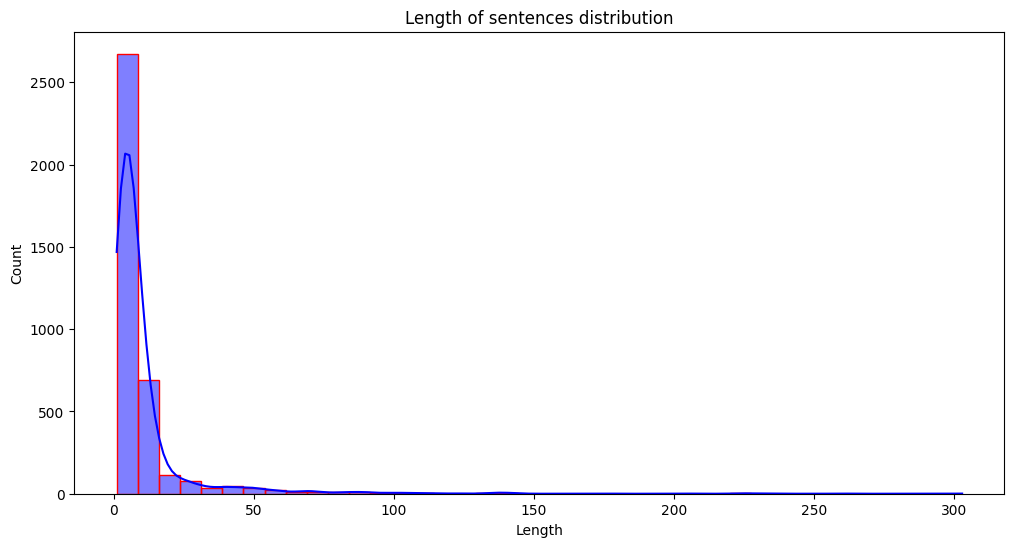

In [ ]:
def clean_text(text):
  words = text.split()
  words = [x for x in words if x[0] != '#' and x[:4] != 'http']
  return ' '.join(words)
def combine_text(text):
  return rdrsegmenter.word_segment(text)
df['content'] = df['content'].apply(clean_text)
df['combine_text'] = df['content'].apply(combine_text)
df['length'] = df['combine_text'].apply(length_text)
plt.figure(figsize=(12, 6))
sns.histplot(df['length'],bins=40,color='Blue',edgecolor='Red',kde=True)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Length of sentences distribution")

In [ ]:
import random
for i in range(10):
  idx = random.randint(0, 100)
  print(df['combine_text'][idx])

['vậy là sau khi mình giới_thiệu cách tự phản_biện , thì chúng_ta sẽ thực_hành một_chút cách nhận_biết fake news . mình sẽ dùng luôn ví_dụ của việt tân , họ vừa_mới đăng xong nên xài cho nóng_hổi . 1 . sử_dụng tập dữ_liệu không hợp_lý : trước_tiên là dùng một câu nói từ một người không liên_quan tới cuộc_chiến , và thứ hai là nêu ra ký_ức không có bằng_chứng xác_thực . mình không thấy tấm ảnh của tấm bia đó đã đục trong dẫn_chứng , và cảnh công_an sục_sạo người_dân khi người_dân nhắc tới ts hs - cái mà vốn được tất_cả học_sinh nhắc tới khi học bài_học địa_lý về chủ_quyền đất_nước . bỏ_qua cái nguồn trust me bro thì công_an không_thể bắt toàn_bộ học_sinh cả nước khi em nào cũng nhắc về vùng_đất của tổ_quốc được . 2 . đánh_tráo khái_niệm để nguỵ_biện lập_luận : cuộc_chiến năm 1974 là hải_chiến hoàng_sa chứ không phải trường_sa . việt tân_cố_tình sử_dụng tên trường_sa là bởi_vì gạc ma thuộc quần_đảo này nên cho vào cho nó tăng độ liên_quan nhưng thực_tế năm 1974 là ở hoàng_sa . 3 . lợi_dụ

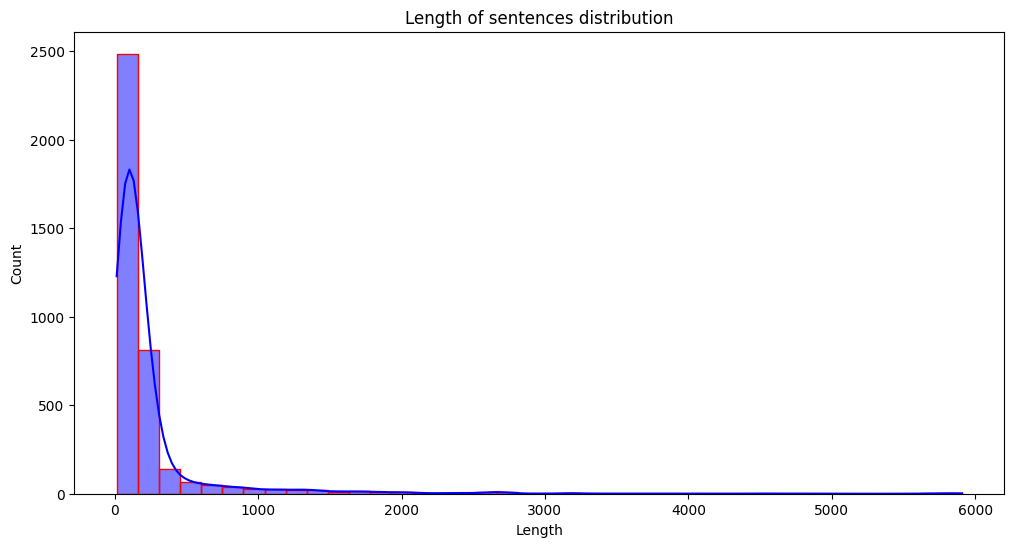

In [ ]:

def concate_text(text):
  return (' '.join(text))
def vn_normalize(text):
    text = re.sub('[^A-Za-z_À-Ỹà-ỹĂ-Ẽă-ẽẮ-Ỷắ-ỷẰ-Ỹằ-ỹẤ-Ỵấ-ỵẦ-Ỵầ-ỵẢ-Ỷả-ỷẲ-Ỹẳ-ỹẨ-Ỵẩ-ỵẠ-Ỵạ-ỵƠ-Ỹơ-ỹỚ-Ỷớ-ỷỜ-Ỹờ-ỹỞ-Ỷở-ỷỠ-Ỹỡ-ỹỢ-Ỵợ-ỵ]', ' ', text).lower()
    return re.sub(r'\d', ' ', text)
def extract_len(text):
  arr = text.split()
  return [x for x in arr if len(x) > 1]
df['text'] = df['combine_text'].apply(concate_text)
df['text'] = df['text'].apply(vn_normalize)
df['text_split'] = df['text'].apply(extract_len)
# df['text'] = df['text'].apply(extract_len)
def plot_len(column_name):
  df['length'] = df[column_name].apply(length_text)
  plt.figure(figsize=(12, 6))
  sns.histplot(df['length'],bins=40,color='Blue',edgecolor='Red',kde=True)
  plt.xlabel("Length")
  plt.ylabel("Count")
  plt.title("Length of sentences distribution")
plot_len('text_split')

In [ ]:
df['length'] = df['text_split'].apply(length_text)
col = df['length'].value_counts().sort_index(ascending=True)
key = list(col.keys())
value = col.values
total = value.sum()
for i in range(100, 1001, 50):
  print(f"The number of records with length <= {i}: {value[[(x <= i) for x in key]].sum()} take {round(value[[(x <= i) for x in key]].sum()/total*100, 2)}%")
print(df.describe())

The number of records with length <= 100: 1580 take 41.91%
The number of records with length <= 150: 2344 take 62.18%
The number of records with length <= 200: 2869 take 76.1%
The number of records with length <= 250: 3141 take 83.32%
The number of records with length <= 300: 3285 take 87.14%
The number of records with length <= 350: 3356 take 89.02%
The number of records with length <= 400: 3396 take 90.08%
The number of records with length <= 450: 3437 take 91.17%
The number of records with length <= 500: 3463 take 91.86%
The number of records with length <= 550: 3484 take 92.41%
The number of records with length <= 600: 3504 take 92.94%
The number of records with length <= 650: 3520 take 93.37%
The number of records with length <= 700: 3534 take 93.74%
The number of records with length <= 750: 3556 take 94.32%
The number of records with length <= 800: 3568 take 94.64%
The number of records with length <= 850: 3575 take 94.83%
The number of records with length <= 900: 3594 take 95.33

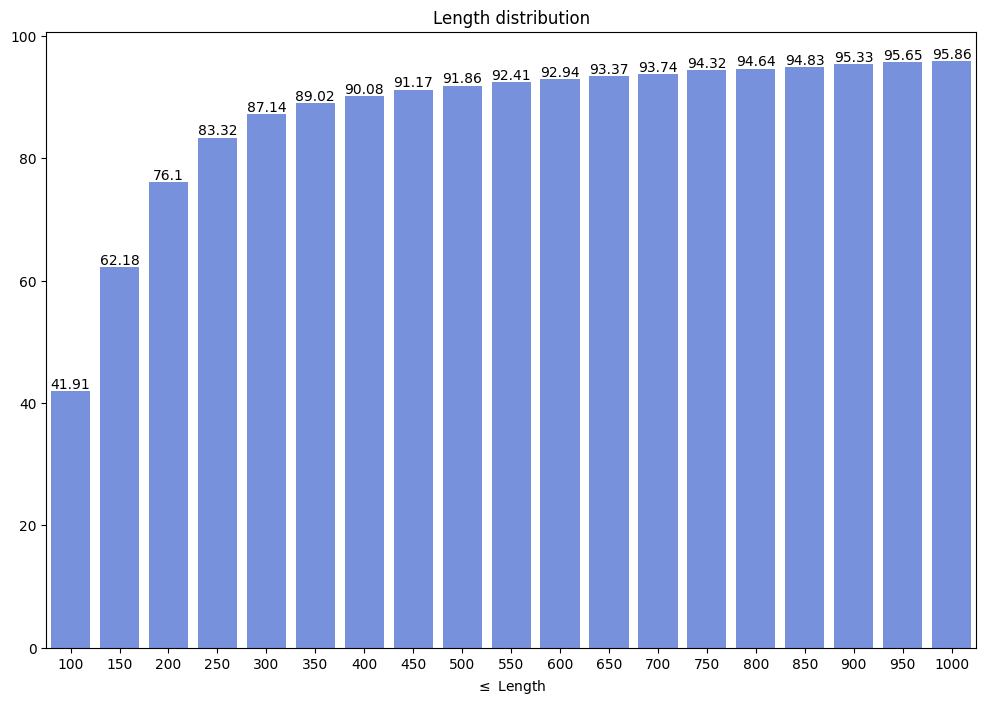

In [ ]:
def freq_len():
  x = []
  y = []
  for i in range(100, 1001, 50):
    x.append(i)
    for j, xi in enumerate():
    y.append(round(value[[(x <= i) for x in key]].sum()/total*100, 2))
  df = pd.DataFrame({'Length': x, 'Percent distribution': y})
  # print(df)
  plt.figure(figsize=(12,8))
  plt.title('Length distribution')
  plt.xlabel(r'$ \leq $ Length')


  #sns.barplot(top_words, x='Words', y='Frequence', color='purple')
  ax = sns.barplot(x=x, y=y, legend='full')
  ax.bar_label(ax.containers[0], fontsize=10);

freq_len()

In [ ]:
import random
for i in range(10):
  idx = random.randint(0, 100)
  print(df['text'][idx])
  print(df['text_split'][idx])
print(df.columns)
# df.drop('content_normalize', axis=1, inplace=True)
df.to_csv('/content/drive/MyDrive/dataset/fixed_data.csv')

         bị hạ   của chương_trình vua tin_vịt   mới_đây vtv đưa tin liên_quan vụ vạn thịnh phát   trương mỹ lan gây khó hiểu về lỗi chính_tả cũng như sự cẩu_thả của biên_tập_viên và đội_ngũ giám_sát chương_trình          bị hạ thì        cái gì bị hạ           tỷ đồng bị hạ hay        cái cây bị hạ   nhiều người cho rằng vtv cố_tình viết sai nhằm làm   giảm sự nghiêm_trọng của vụ_việc mà vẫn đảm_bảo tính khách_quan     tóm_lại   khổ nhất vẫn là        bị hạ   i kia   chẳng lấy lại được đồng nào   còn chính_quyền cho bắt chị lan thì cứ nhả đồng nào xung công_quỹ hết   hạnh_nhân
['bị', 'hạ', 'của', 'chương_trình', 'vua', 'tin_vịt', 'mới_đây', 'vtv', 'đưa', 'tin', 'liên_quan', 'vụ', 'vạn', 'thịnh', 'phát', 'trương', 'mỹ', 'lan', 'gây', 'khó', 'hiểu', 'về', 'lỗi', 'chính_tả', 'cũng', 'như', 'sự', 'cẩu_thả', 'của', 'biên_tập_viên', 'và', 'đội_ngũ', 'giám_sát', 'chương_trình', 'bị', 'hạ', 'thì', 'cái', 'gì', 'bị', 'hạ', 'tỷ', 'đồng', 'bị', 'hạ', 'hay', 'cái', 'cây', 'bị', 'hạ', 'nhiều', 'ngư

In [ ]:
print(df['label'])

0       0
1       1
2       1
3       0
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: label, Length: 3772, dtype: int64


In [ ]:
def concate_text(text):
  text = rdrsegmenter.word_segment(text)
  text = (' '.join(text))
  text = re.sub('[^A-Za-z_À-Ỹà-ỹĂ-Ẽă-ẽẮ-Ỷắ-ỷẰ-Ỹằ-ỹẤ-Ỵấ-ỵẦ-Ỵầ-ỵẢ-Ỷả-ỷẲ-Ỹẳ-ỹẨ-Ỵẩ-ỵẠ-Ỵạ-ỵƠ-Ỹơ-ỹỚ-Ỷớ-ỷỜ-Ỹờ-ỹỞ-Ỷở-ỷỠ-Ỹỡ-ỹỢ-Ỵợ-ỵ]', ' ', text).lower()
  return re.sub(r'\d', ' ', text)